In [102]:
import sys
sys.path.append('..')
import itertools, copy
import json
import numpy as np
import scipy.misc
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('../custom.mplstyle')

from lib import *
from base import *

In [3]:
output = True
aas_arr = np.array(list(aminoacids))
N = 4
seed = 1234
prng = np.random.RandomState(seed)


In [6]:
humanseqs = [s for s in fasta_iter(human, returnheader=False)]
train, test = train_test_split(humanseqs, test_size=0.5)


In [9]:
# evaluate empirical observables for fitting
df0 = count(train, 1)
df1 = count(train, 2, gap=0)
dfgap1 = count(train, 2, gap=1)
dfgap2 = count(train, 2, gap=2)

In [10]:
h, Jk = fit_ising(df0, [df1, dfgap1, dfgap2], nmcmc=1e6, niter=30, epsilon=0.1, prng=prng, output=output, N=N)

[ 0.46011294 -0.66063989  0.05774567  0.46140263 -0.20088463  0.3939762
 -0.52393268 -0.03443961  0.24542297  0.80966027 -0.73823204 -0.21909044
  0.35340522  0.07413293  0.23697674  0.62224697  0.17656732  0.29459131
 -1.293836   -0.5151859 ]
iteration 0
f1 1.522898693065261e-06
f2, gap 0 0.002389626857681986
f2, gap 1 0.0017856040684536955
f2, gap 2 0.0019484053973687473
iteration 1
f1 2.6668264323075684e-06
f2, gap 0 0.0019948547852433425
f2, gap 1 0.0014822126881021852
f2, gap 2 0.0016161554791216917
iteration 2
f1 5.7016337530539066e-06
f2, gap 0 0.0015874638556658662
f2, gap 1 0.0010956632776655789
f2, gap 2 0.0012546877479135536
iteration 3
f1 5.077489165198753e-06
f2, gap 0 0.001287340720184847
f2, gap 1 0.0009781249925279014
f2, gap 2 0.001096773962313074
iteration 4
f1 5.754426891491868e-06
f2, gap 0 0.001060822159517603
f2, gap 1 0.0007836362950464884
f2, gap 2 0.0009640595245758452
iteration 5
f1 4.855084364655073e-06
f2, gap 0 0.0008568795047436233
f2, gap 1 0.000683088622

,freq_train,freq_test,freq_test
seq,,,
AAAA,3.975436e-04,NaN,3.831855e-04
AAAC,1.390013e-05,NaN,1.280794e-05
AAAD,2.762650e-05,NaN,2.526498e-05
AAAE,5.577426e-05,NaN,5.175812e-05
AAAF,2.832151e-05,NaN,2.193141e-05
AAAG,9.399961e-05,NaN,9.281371e-05
AAAH,1.737516e-05,NaN,1.561516e-05
AAAI,2.571524e-05,NaN,2.193141e-05
AAAK,3.110153e-05,NaN,3.438844e-05


In [66]:
k = 4
df4 = count(train, k)
df4 = df4.merge(count(test, k), right_index=True, left_index=True, suffixes=['_train', '_test'])
jsd_test = calc_jsd(df4['freq_train'], df4['freq_test'])
jsd_flat = calc_jsd(df4['freq_test'], np.ones_like(df4['freq_test']))

In [68]:
with open('../../data/triplet-human.json', 'r') as f:
    tripletparams = json.load(f)
kmers = df4.index
df4['freq_ind'] = np.array([10**(loglikelihood_independent(s, **tripletparams)) for s in kmers])
df4['freq_mc'] = np.array([10**(loglikelihood_mc(s, **tripletparams)) for s in kmers])
df4['freq_tri'] = np.array([10**(loglikelihood_triplet(s, **tripletparams)) for s in kmers])
jsd_ind = calc_jsd(df4['freq_test'], df4['freq_ind'])
jsd_mc = calc_jsd(df4['freq_test'], df4['freq_mc'])
jsd_tri = calc_jsd(df4['freq_test'], df4['freq_tri'])

In [69]:
q = len(aminoacids)
Z = np.exp(scipy.special.logsumexp([-clib.energy(np.array(s), h, Jk) for s in itertools.product(range(q), repeat=k)]))
df4['freq_maxent'] = np.exp([-clib.energy(map_aatonumber(s), h, Jk) for s in kmers])/Z
jsd_maxent = calc_jsd(df4['freq_test'], df4['freq_maxent'])

In [70]:
print('flat', jsd_flat, 'ind', jsd_ind, 'mc', jsd_mc, 'model', jsd_maxent, 'tri', jsd_tri, 'test', jsd_test, )

flat 0.11022413525881233 ind 0.019422543152563265 mc 0.013133736028236852 model 0.009155048901039988 tri 0.00870439210858727 test 0.007588070936076536


In [28]:
q = len(aminoacids)
N = 4
nmcmc = 1e6
prng = np.random
def jump(x):
    return prng.randint(q, size=N)
def energy(x):
    return clib.energy(x, h, Jk)
x0 = jump(None)
samples = mcmcsampler(x0, energy, jump, nmcmc)
samples = [''.join(aas_arr[s]) for s in samples]

0.005162126422964316

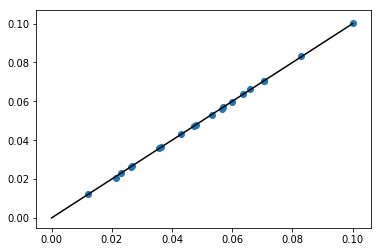

In [30]:
dfm0 = df0.merge(count(samples, 1), left_index=True, right_index=True)
x = np.linspace(0.0, 0.1)
plt.plot(x, x, 'k')
plt.scatter(dfm0['freq_x'], dfm0['freq_y'])
dfm0['logfold'] = np.log(dfm0['freq_x']/dfm0['freq_y'])
np.abs(dfm0['logfold']).mean()

0.01984155921791898

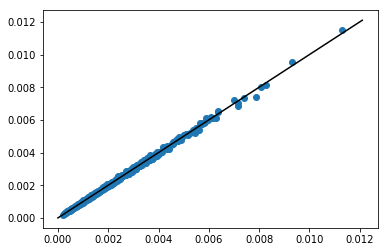

In [33]:
dfm1 = df1.merge(count(samples, 2), left_index=True, right_index=True)
x = np.linspace(0.0, 0.11**2)
plt.plot(x, x, 'k')
plt.scatter(dfm1['freq_x'], dfm1['freq_y'])
dfm1['logfold'] = np.log(dfm1['freq_x']/dfm1['freq_y'])
np.abs(dfm1['logfold']).mean()

0.02306294047711688

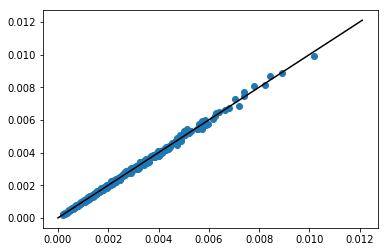

In [35]:
dfmgap1 = dfgap1.merge(count(samples, 2, gap=1), left_index=True, right_index=True)
x = np.linspace(0.0, 0.11**2)
plt.plot(x, x, 'k')
plt.scatter(dfmgap1['freq_x'], dfmgap1['freq_y'])
dfmgap1['logfold'] = np.log(dfmgap1['freq_x']/dfmgap1['freq_y'])
np.abs(dfmgap1['logfold']).mean()

0.03242584925616405

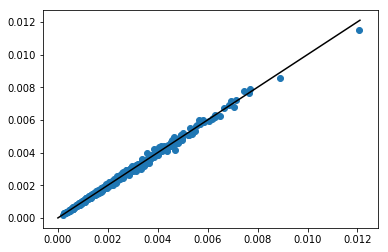

In [36]:
dfmgap2 = dfgap2.merge(count(samples, 2, gap=2), left_index=True, right_index=True)
x = np.linspace(0.0, 0.11**2)
plt.plot(x, x, 'k')
plt.scatter(dfmgap2['freq_x'], dfmgap2['freq_y'])
dfmgap2['logfold'] = np.log(dfmgap2['freq_x']/dfmgap2['freq_y'])
np.abs(dfmgap2['logfold']).mean()

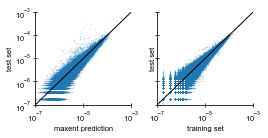

In [108]:
fig, axes = plt.subplots(figsize=(3.8, 2.0), ncols=2, sharex=True, sharey=True)
ax = axes[0]
ax.scatter(df4['freq_maxent'], df4['freq_test'], s=0.5, label='maxent', alpha=.1)
ax.set_xlabel('maxent prediction')
ax.set_ylabel('test set')
ax = axes[1]
ax.scatter(df4['freq_train'], df4['freq_test'], s=0.5, label='train', alpha=.1)
ax.set_xlabel('training set')
ax.set_ylabel('test set')
x = np.logspace(-7, -3)
for ax in axes:
    ax.plot(x, x, 'k')
    ax.set_xlim(min(x), max(x))
    ax.set_ylim(min(x), max(x))
    #plt.legend()
    ax.set_xscale('log')
    ax.set_yscale('log')
fig.tight_layout()
fig.savefig('4mer-comparison.png', dpi=600)

In [23]:
dfJk = [pd.DataFrame.from_dict(J) for J in Jk]

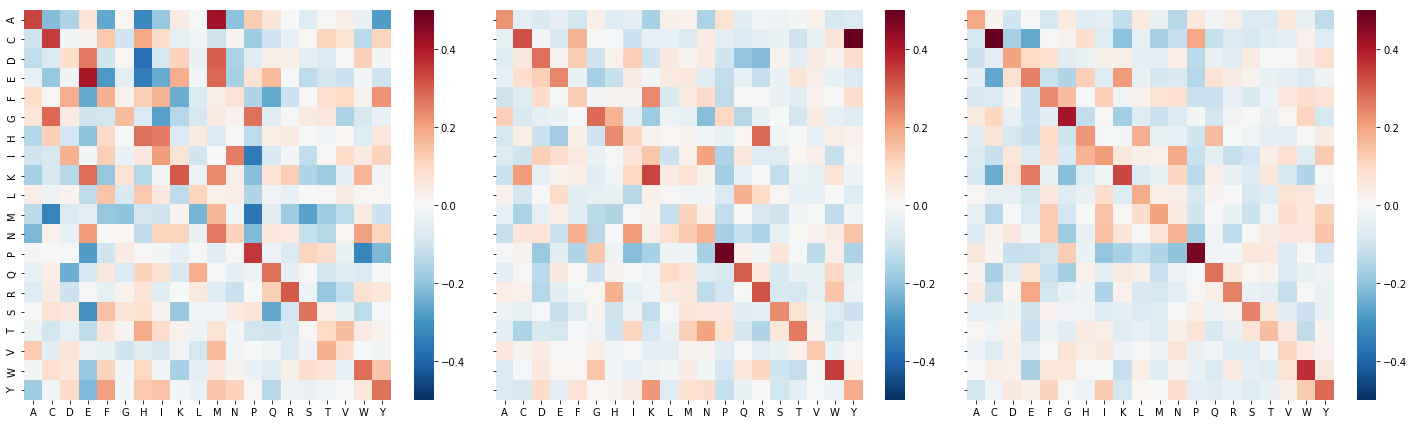

In [24]:
fig, axes = plt.subplots(figsize=(20, 6), ncols=len(dfJk), sharex=True, sharey=True)
for i, dfJ in enumerate(dfJk):
    sns.heatmap(dfJ, vmin=-0.5, vmax=0.5, cmap='RdBu_r', ax=axes[i])
fig.tight_layout()

In [27]:
k = 5
#kmers = list(itertools.product(aminoacids, repeat=k))
df = counter_to_df(count_kmers_proteome(human, k))
df = df[~df['seq'].str.contains('U|B|X|Z')]
df = df.set_index('seq')
kmers = df.index
exp = np.array([float(df.loc[''.join(s)]) for s in kmers])
Z = np.exp(scipy.special.logsumexp([-energy_ising(s, h, Jk) for s in itertools.product(aminoacids, repeat=k)]))
ising = np.exp([-energy_ising(s, h, Jk) for s in kmers])/Z
tri = np.array([10**(loglikelihood_triplet(s, **tripletparams)) for s in kmers])
mc = np.array([10**(loglikelihood_mc(s, **tripletparams)) for s in kmers])
ind = np.array([10**(loglikelihood_independent(s, **tripletparams)) for s in kmers])
rising = np.corrcoef(ising, exp)[1, 0]
rind = np.corrcoef(ind, exp)[1, 0]
rtri = np.corrcoef(tri, exp)[1, 0]
rtri, rising, np.corrcoef(mc, exp)[1, 0], rind

(0.6698462989385501, 0.658764374383573, 0.5852676481182697, 0.5268749495340342)

In [ ]:
fig = plt.figure(figsize=(4, 4))
plt.scatter(ind, exp, s=1, label='independent, r=%1.2f'%rind)
#plt.scatter(mc, exp, s=1)
plt.scatter(tri, exp, s=1, label='tri, r=%1.2f'%rtri)
x = np.logspace(-7, -3)
plt.xlabel('predicted')
plt.ylabel('observed')
plt.plot(x, x, 'k')
plt.xlim(min(x), max(x))
plt.ylim(min(x), max(x))
plt.legend()
plt.xscale('log')
plt.yscale('log')
fig.tight_layout()
fig.savefig('plots/modelfits-4mer-tri.png', dpi=300)

In [ ]:
pd.DataFrame(index=[key for key in h], data=[h[key] for key in h], columns=['h'])

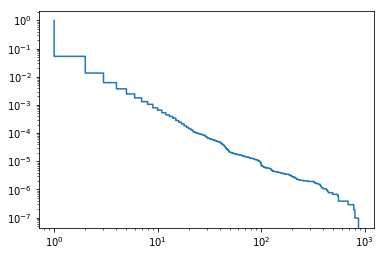

In [7]:
plot_sorted(df['count'])

In [ ]:
doublets = [''.join(s) for s in itertools.product(list(aminoacids), repeat=2)]

In [ ]:
df = pd.DataFrame(index=doublets, data=[Jk[0][s[0]][s[1]] for s in doublets], columns=['J0'])
for i in range(1, len(Jk)):
    df['J%g'%i] = [Jk[i][s[0]][s[1]] for s in doublets]

In [ ]:
from functools import reduce

In [ ]:
df

In [ ]:
reduce(lambda left,right: pd.merge(left,right, left_index=True, right_index=True), [pd.DataFrame.from_dict(
    {i+j: Jk[gap][i][j] for i in Jk[gap].keys() for j in Jk[gap][i].keys()},
    orient='index')
           for gap in range(len(Jk))])

In [ ]:
pd.merge?